# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [236]:
df = pd.read_csv("cement_slump.csv")

# EDA and Graphical analysis

In [237]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [238]:
df.shape

(103, 10)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [240]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [241]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [242]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


<AxesSubplot:>

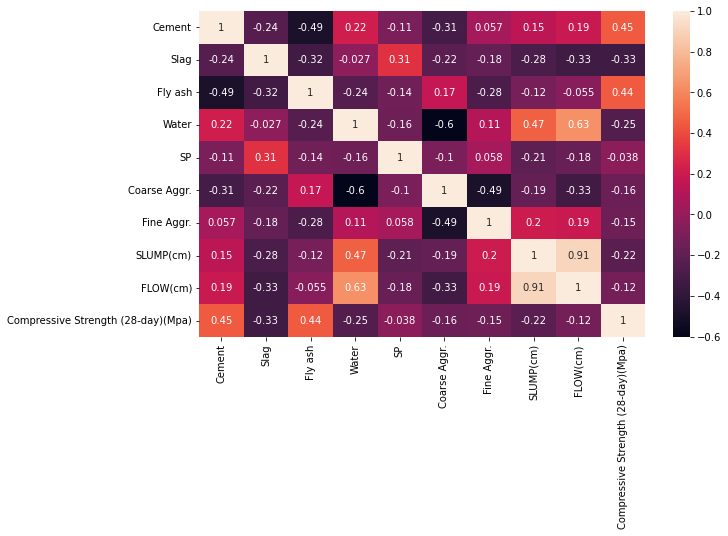

In [243]:
sns.heatmap(df.corr(),annot=True)

In [244]:
r = len(df.columns[0:])//2+ 1*(len(df.columns[0:])%2==1)
c = 2
r,c

(5, 2)

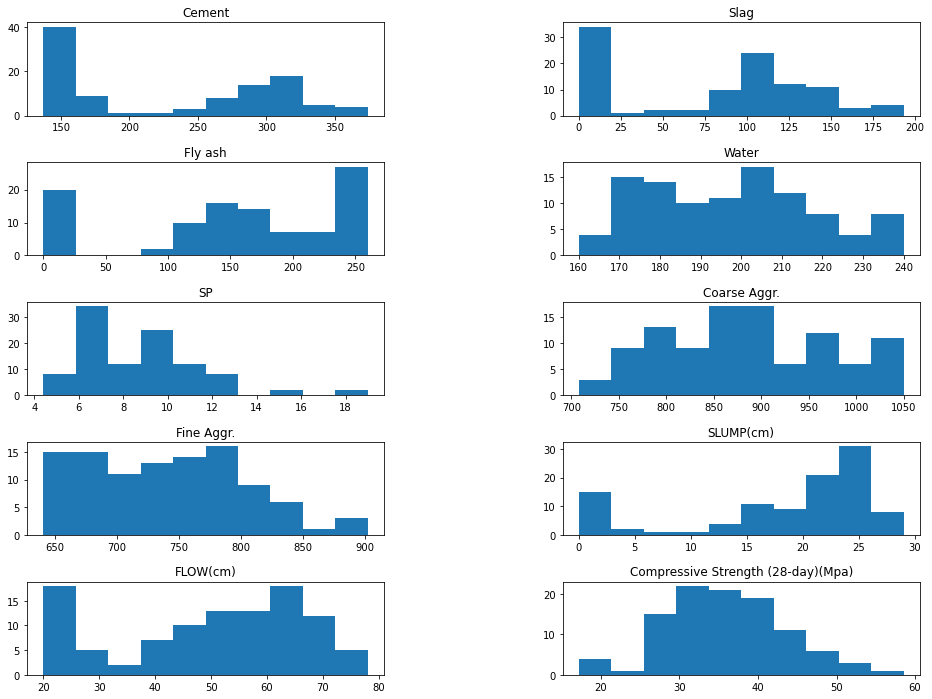

In [245]:
fig, ax = plt.subplots(nrows=r,ncols=c, figsize=(16,12))
fig.subplots_adjust(left=None,    bottom=None,    right=None,    top=None,    wspace=0.5,    hspace=0.5)

for i,col in enumerate(df.columns[0:]):
    ax[i//2,i%2].hist(df[col])
    ax[i//2,i%2].set_title(col)

In [247]:
R2_score= df.corr()**2
R2_score

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,0.059,0.237,0.049,0.011,0.096,0.003,0.021,0.035,0.199
Slag,0.059,1.000,0.104,0.001,0.094,0.050,0.034,0.081,0.107,0.110
Fly ash,0.237,0.104,1.000,0.058,0.021,0.030,0.080,0.014,0.003,0.197
Water,0.049,0.001,0.058,1.000,0.024,0.363,0.013,0.218,0.399,0.065
SP,0.011,0.094,0.021,0.024,1.000,0.011,0.003,0.045,0.031,0.001
Coarse Aggr.,0.096,0.050,0.030,0.363,0.011,1.000,0.239,0.035,0.106,0.026
Fine Aggr.,0.003,0.034,0.080,0.013,0.003,0.239,1.000,0.041,0.036,0.024
SLUMP(cm),0.021,0.081,0.014,0.218,0.045,0.035,0.041,1.000,0.821,0.050
FLOW(cm),0.035,0.107,0.003,0.399,0.031,0.106,0.036,0.821,1.000,0.015
Compressive Strength (28-day)(Mpa),0.199,0.110,0.197,0.065,0.001,0.026,0.024,0.050,0.015,1.000


# Data Preprocessing 

### Features and target variable

In [248]:
X = df.drop("Compressive Strength (28-day)(Mpa)",axis=1)
y = df["Compressive Strength (28-day)(Mpa)"]

### Splitting data into training and testing

In [249]:
from sklearn.model_selection import train_test_split

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

In [253]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (87, 9)
Train target shape   :  (87,)
Test features shape  :  (16, 9)
Test target shape    :  (16,)


## Scaling

In [255]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Robustscaler is used when outlier could be present

scaler = StandardScaler()

In [256]:
scaler.fit(X_train)

StandardScaler()

In [257]:
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit
X_train_scaled

array([[ 0.89094213, -1.37478718,  1.07634895,  1.96652615, -0.09964784,
        -1.17197442, -0.26758075,  0.8070358 ,  1.58787814],
       [ 1.91587437, -1.37478718, -1.78318718, -0.35620532, -0.58334614,
         1.52415804, -0.15905506, -0.39414905, -0.40685515],
       [-1.13157345,  0.79190497,  0.17164369, -0.70813433,  1.27703195,
        -0.12109683,  0.52878384,  0.66403761,  0.20023759],
       [ 1.49912937,  0.92732323, -1.78318718,  1.40343973,  0.90495633,
        -1.29131333,  0.10079519,  0.34944157,  0.66278444],
       [ 1.08238437, -1.37478718, -0.07867002,  1.05151072,  0.53288071,
        -1.09434619,  0.97205779, -0.56574689, -0.2044909 ],
       [-0.84506126,  1.13045062,  0.4815559 , -0.90923663,  3.88156127,
        -0.5034448 ,  0.00908334, -1.70973247, -1.62104062],
       [-1.12896879, -0.61644493,  1.01675044, -1.29635854, -1.14145957,
         1.92504409, -0.55647309,  0.63543797,  0.17132842],
       [ 1.12145421,  0.72419584, -1.78318718,  0.39792827,  0

In [258]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.80599142,  1.16430518, -1.78318718, -0.75840991,  1.27703195,
         1.64002106, -0.17434037, -0.39414905, -1.70776816],
       [-0.83203798,  1.1473779 ,  0.4934756 , -0.85896105,  1.27703195,
        -0.44551329,  0.08550988, -2.05292815, -1.70776816],
       [ 1.42098968,  0.89346866, -1.78318718,  1.25261301, -0.95542176,
        -1.45352155,  0.71220754,  0.92143436,  0.83623951],
       [-1.13027112, -1.3036926 ,  0.79027614, -0.16013059, -1.43912006,
         1.94705806, -0.4632327 ,  0.74983653,  0.43151102],
       [ 1.00164002, -1.37140173,  1.07515698,  1.97658126, -0.09964784,
        -1.17429168, -0.3837491 ,  0.8070358 ,  1.6456965 ],
       [ 0.79587218, -1.37478718, -0.34090343, -1.00978777, -0.58334614,
         0.30759634,  1.35419051,  0.52103941, -0.05994501],
       [-1.12506181, -0.34053023,  1.06442925, -0.73327212, -1.06704444,
         1.57861366, -0.90192106,  0.74983653,  0.60496609],
       [ 1.06936109, -1.37478718, -0.09058972,  1.05151072,  0

In [259]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [260]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


##  1. Model Building (Linear Regression)

In [261]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [262]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [264]:
print("R2_train:", lm.score(X_train_scaled,y_train), "\nR2_test:", lm.score(X_test_scaled,y_test))


R2_train: 0.8994546656631518 
R2_test: 0.9432835456868278


In [265]:
lm.intercept_

36.05931034482759

### 1.1 Interpret the model

In [266]:
lm.coef_

array([ 4.18526705, -2.41592483,  3.56341094, -4.6772355 , -0.06223275,
       -5.0818102 , -2.89317904, -2.02519303,  1.37575556])

In [267]:
pd.DataFrame(lm.coef_,X_train.columns, columns=["Coefs_"])

,Coefs_
Cement,4.185
Slag,-2.416
Fly ash,3.563
Water,-4.677
SP,-0.062
Coarse Aggr.,-5.082
Fine Aggr.,-2.893
SLUMP(cm),-2.025
FLOW(cm),1.376


In [268]:
for k,v in dict(zip(X_train.columns, lm.coef_)).items():
     print(f"{k:<20}","\t",f"{v:.3f}")

Cement               	 4.185
Slag                 	 -2.416
Fly ash              	 3.563
Water                	 -4.677
SP                   	 -0.062
Coarse Aggr.         	 -5.082
Fine Aggr.           	 -2.893
SLUMP(cm)            	 -2.025
FLOW(cm)             	 1.376


In [269]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [270]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
37,18.260,17.606,0.654
1,41.140,39.326,1.814
69,31.900,32.305,-0.405
80,26.420,28.654,-2.234
92,44.480,45.865,-1.385
61,39.930,39.637,0.293
85,30.970,33.363,-2.393
53,38.590,39.043,-0.453
88,37.920,37.816,0.104
32,52.650,52.138,0.512


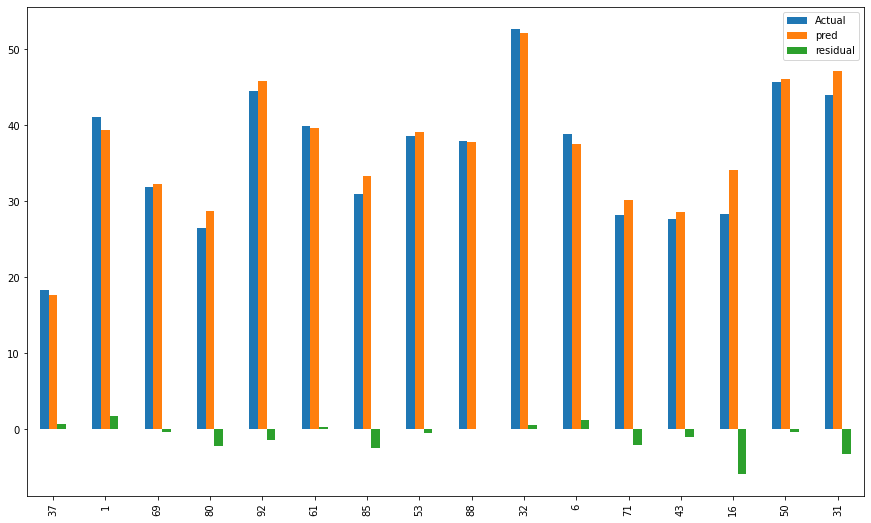

In [271]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

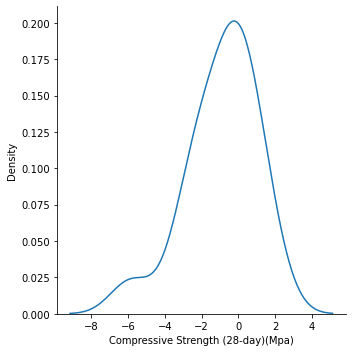

In [272]:
residuals = y_test-y_pred
sns.displot(residuals, kind="kde");

In [273]:
f"{len(residuals[residuals>0])} low + {len(residuals[residuals<0])} high = {len(X_test)}"

'6 low + 10 high = 16'

In [274]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

### 1.2 Model Evaluation

In [275]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # Evaluate the result. Overfitting?
ls

,linear_train,linear_test
R2,0.899,0.943
mae,1.990,1.496
mse,5.846,4.276
rmse,2.418,2.068


In [277]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

## MC

In [278]:
pd.DataFrame(df).corr().style.applymap(color_red)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445656
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331522
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444380
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254320
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037909
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160610
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154532
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223499
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124189
Compressive Strength (28-day)(Mpa),0.445656,-0.331522,0.444380,-0.254320,-0.037909,-0.160610,-0.154532,-0.223499,-0.124189,1.000000


## CRoss Validation

In [279]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [280]:
from sklearn.model_selection import cross_validate, cross_val_score

In [281]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [282]:
scores

{'fit_time': array([0.60965824, 0.04297161, 0.12392449, 0.1539135 , 0.00399518]),
 'score_time': array([0.02198601, 0.00700355, 0.00699687, 0.00999284, 0.00499582]),
 'test_r2': array([0.85562794, 0.94139096, 0.86776176, 0.72152004, 0.89895096]),
 'test_neg_mean_absolute_error': array([-2.64008726, -1.62637842, -2.33851255, -2.90344244, -1.78283894]),
 'test_neg_mean_squared_error': array([-10.25246017,  -4.00046617,  -6.93575008, -11.02528731,
         -4.6439441 ]),
 'test_neg_root_mean_squared_error': array([-3.20194631, -2.00011654, -2.63358123, -3.32043481, -2.15498123])}

In [283]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.610,0.022,0.856,-2.640,-10.252,-3.202
2,0.043,0.007,0.941,-1.626,-4.000,-2.000
3,0.124,0.007,0.868,-2.339,-6.936,-2.634
4,0.154,0.010,0.722,-2.903,-11.025,-3.320
5,0.004,0.005,0.899,-1.783,-4.644,-2.155


In [284]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.857
test_neg_mean_absolute_error       -2.258
test_neg_mean_squared_error        -7.372
test_neg_root_mean_squared_error   -2.662
dtype: float64

In [285]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.899,0.943
mae,1.990,1.496
mse,5.846,4.276
rmse,2.418,2.068


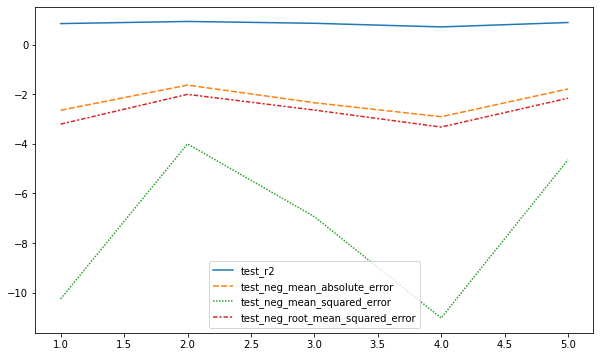

In [286]:
sns.lineplot(data = scores.iloc[:,2:]);

# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [288]:
from sklearn.linear_model import Ridge

In [290]:
ridge_model = Ridge(alpha=1, random_state=42)
ridge_model.fit(X_train_scaled,y_train)

Ridge(alpha=1, random_state=42)

In [291]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [292]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.899,0.941
mae,1.977,1.522
mse,5.895,4.452
rmse,2.428,2.110


In [293]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.899,0.943,0.899,0.941
mae,1.990,1.496,1.977,1.522
mse,5.846,4.276,5.895,4.452
rmse,2.418,2.068,2.428,2.110


In [294]:
model = Ridge(alpha=1, random_state=42)  
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [295]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.027,0.006,0.852,-2.608,-10.535,-3.246
2,0.003,0.006,0.935,-1.712,-4.461,-2.112
3,0.002,0.004,0.871,-2.221,-6.757,-2.599
4,0.003,0.005,0.743,-2.778,-10.157,-3.187
5,0.002,0.002,0.900,-1.792,-4.597,-2.144


In [296]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.860
test_neg_mean_absolute_error       -2.222
test_neg_mean_squared_error        -7.302
test_neg_root_mean_squared_error   -2.658
dtype: float64

In [297]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.899,0.941
mae,1.977,1.522
mse,5.895,4.452
rmse,2.428,2.110


<AxesSubplot:>

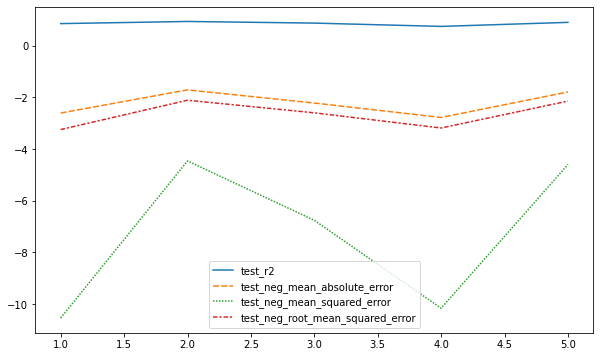

In [298]:
sns.lineplot(data = scores.iloc[:,2:])

In [299]:
ridge_model.coef_  

array([ 5.00657331, -1.46066397,  4.51394962, -3.74046081,  0.08955365,
       -3.73021911, -1.86783819, -1.77162205,  1.03089914])

In [302]:
from sklearn.linear_model import RidgeCV

In [303]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [304]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [305]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [306]:
ridge_cv_model.alpha_ #Ridge(alpha=0.62)

0.7000000000000001

In [307]:
ridge_cv_model.best_score_

-2.6567919581637485

In [308]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [309]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.899,0.942
mae,1.979,1.507
mse,5.877,4.375
rmse,2.424,2.092


In [310]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.899,0.943,0.899,0.941,0.899,0.942
mae,1.990,1.496,1.977,1.522,1.979,1.507
mse,5.846,4.276,5.895,4.452,5.877,4.375
rmse,2.418,2.068,2.428,2.110,2.424,2.092


## 2.2 Lasso (Apply and evalute)

In [311]:
from sklearn.linear_model import Lasso, LassoCV

In [312]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [313]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [314]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.769,0.743
mae,2.897,3.567
mse,13.416,19.409
rmse,3.663,4.406


In [315]:
pd.concat([ls, rs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test
R2,0.899,0.943,0.899,0.941,0.769,0.743
mae,1.990,1.496,1.977,1.522,2.897,3.567
mse,5.846,4.276,5.895,4.452,13.416,19.409
rmse,2.418,2.068,2.428,2.110,3.663,4.406


In [316]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [317]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.007,0.005,0.653,-4.000,-24.622,-4.962
2,0.005,0.006,0.713,-3.744,-19.593,-4.426
3,0.004,0.006,0.814,-2.625,-9.781,-3.127
4,0.006,0.006,0.758,-2.419,-9.588,-3.096
5,0.006,0.008,0.746,-2.579,-11.680,-3.418


In [318]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.737
test_neg_mean_absolute_error        -3.073
test_neg_mean_squared_error        -15.053
test_neg_root_mean_squared_error    -3.806
dtype: float64

In [319]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.769,0.743
mae,2.897,3.567
mse,13.416,19.409
rmse,3.663,4.406


<AxesSubplot:>

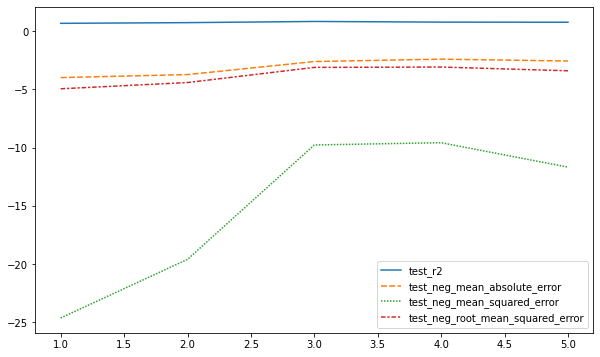

In [320]:
sns.lineplot(data = scores.iloc[:,2:])

In [321]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [322]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [323]:
lasso_cv_model.alpha_

0.01

In [324]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([99], dtype=int64),)

In [325]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [326]:
lasso_cv_model.mse_path_[-1].mean()

7.477306086553746

In [327]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [328]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.899,0.943
mae,1.976,1.512
mse,5.872,4.266
rmse,2.423,2.065


In [329]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.899,0.943,0.899,0.941,0.899,0.942,0.769,0.743,0.899,0.943
mae,1.990,1.496,1.977,1.522,1.979,1.507,2.897,3.567,1.976,1.512
mse,5.846,4.276,5.895,4.452,5.877,4.375,13.416,19.409,5.872,4.266
rmse,2.418,2.068,2.428,2.110,2.424,2.092,3.663,4.406,2.423,2.065


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [330]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [331]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio: 1: Lasso or 0:Ridge
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [332]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [333]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.628,0.597
mae,3.723,4.587
mse,21.637,30.367
rmse,4.652,5.511


In [334]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.899,0.943,0.899,0.941,0.899,0.942,0.769,0.743,0.899,0.943,0.628,0.597
mae,1.990,1.496,1.977,1.522,1.979,1.507,2.897,3.567,1.976,1.512,3.723,4.587
mse,5.846,4.276,5.895,4.452,5.877,4.375,13.416,19.409,5.872,4.266,21.637,30.367
rmse,2.418,2.068,2.428,2.110,2.424,2.092,3.663,4.406,2.423,2.065,4.652,5.511


## Polinomial degree 2

In [335]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
...,...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000,49.170


In [336]:
X 

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000
...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000


In [337]:
from sklearn.preprocessing import PolynomialFeatures

In [338]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [339]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [340]:
poly_features = polynomial_converter.transform(X)

In [341]:
poly_features

array([[2.7300e+02, 8.2000e+01, 1.0500e+02, ..., 5.2900e+02, 1.4260e+03,
        3.8440e+03],
       [1.6300e+02, 1.4900e+02, 1.9100e+02, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+02],
       [1.6200e+02, 1.4800e+02, 1.9100e+02, ..., 1.0000e+00, 2.0000e+01,
        4.0000e+02],
       ...,
       [2.5880e+02, 8.8000e+01, 2.3960e+02, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+02],
       [2.9710e+02, 4.0900e+01, 2.3990e+02, ..., 7.5625e+02, 1.8425e+03,
        4.4890e+03],
       [3.4870e+02, 1.0000e-01, 2.2310e+02, ..., 8.4100e+02, 2.2620e+03,
        6.0840e+03]])

In [344]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.995668,0.158189,0.074589,0.963753,0.721120,0.961543,0.974825,0.660000,0.758939,-0.293346,-0.453874,-0.212547,-0.247417,-0.273874,-0.231065,-0.078165,-0.130500,-0.498806,-0.455517,-0.443714,-0.516049,-0.488210,-0.263890,-0.299692,0.213443,-0.023772,-0.067482,0.181807,0.173242,0.202015,-0.155736,-0.187719,-0.088402,0.151382,0.145818,-0.324266,-0.256265,0.078618,0.108250,0.042908,0.142429,0.176588,0.154726,0.178538,0.193265
1,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.256675,0.857129,-0.468764,-0.225849,0.013495,-0.312844,-0.269993,-0.313571,-0.347486,0.952997,0.630565,0.987791,0.888718,0.988430,0.990587,0.627977,0.789426,-0.294472,-0.341286,-0.158371,-0.339783,-0.386605,-0.496975,-0.496659,-0.035627,0.300692,-0.265292,-0.127260,-0.246228,-0.272976,0.297234,0.238491,0.255954,-0.138735,-0.103630,-0.231119,-0.401926,-0.345419,-0.414034,-0.180174,-0.288820,-0.338252,-0.207659,-0.258828,-0.291068
2,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,-0.491348,-0.535795,0.790922,-0.506265,-0.493723,-0.473746,-0.529622,-0.348101,-0.332628,-0.283747,0.427011,-0.362905,-0.322843,-0.306133,-0.381081,-0.426795,-0.409057,0.953924,0.973801,0.808662,0.978437,0.982332,0.639288,0.770714,-0.223550,-0.229053,-0.119426,-0.331675,-0.144428,-0.087215,-0.093814,-0.100142,-0.204088,-0.211872,-0.156369,0.186159,-0.089360,-0.080283,-0.011986,-0.267135,-0.150837,-0.099010,-0.078519,-0.054587,-0.017143
3,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,0.228779,0.070292,-0.129602,0.458101,0.099546,0.071306,0.219644,0.450728,0.526110,-0.024146,-0.206261,0.085824,-0.098710,-0.094431,-0.008262,0.328394,0.280939,-0.247374,-0.033738,-0.283508,-0.354279,-0.206100,0.166778,0.183394,0.998585,0.160301,0.462133,0.792143,0.620773,0.774501,-0.193629,-0.321469,-0.121140,0.353984,0.416720,-0.597259,-0.535239,0.346409,0.486201,0.113165,0.453916,0.612180,0.444397,0.562913,0.657867
4,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.119705,0.224480,-0.175984,-0.123810,0.572970,-0.136414,-0.088481,-0.139701,-0.119514,0.350162,0.102549,0.272099,0.641316,0.303610,0.322318,0.043567,0.132037,-0.145210,-0.172133,0.421230,-0.162271,-0.134333,-0.265341,-0.210848,-0.154850,0.945795,-0.281875,-0.078646,-0.217986,-0.179766,0.977239,0.955953,0.971301,0.260734,0.477162,-0.112414,-0.049928,-0.236763,-0.214907,0.047899,-0.195166,-0.154318,-0.188991,-0.177293,-0.155648
5,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.304279,-0.315547,-0.051163,-0.419254,-0.319394,-0.055075,-0.393414,-0.320062,-0.397388,-0.215490,-0.079807,-0.289016,-0.189479,-0.114460,-0.275586,-0.323539,-0.352332,0.257000,0.031980,0.063706,0.352557,0.087486,0.024299,-0.037119,-0.596112,-0.296608,0.424957,-0.737644,-0.297488,-0.423187,-0.068609,0.177150,-0.214602,-0.222380,-0.335280,0.998601,0.624062,0.028254,-0.039748,-0.490642,-0.269022,-0.426201,-0.261292,-0.323003,-0.381573
6,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,0.067734,-0.131754,-0.239927,0.060594,0.091401,-0.065833,0.266998,0.156825,0.123426,-0.148225,-0.432175,-0.159803,-0.096259,-0.246691,-0.070972,0.037055,-0.038547,-0.338537,-0.235584,-0.201131,-0.360104,-0.111527,-0.029341,-0.071649,0.106390,0.097346,-0.410260,0.693900,0.192666,0.174601,0.047330,-0.079726,0.286417,0.214782,0.197638,-0.481688,0.373701,0.098920,0.047265,0.998858,0.364128,0.408623,0.189762,0.182238,0.163393
7,0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,0.151401,-0.178357,-0.029181,0.248724,0.034088,0.091507,0.179236,0.803649,0.657100,-0.349430,-0.385227,-0.193301,-0.35008

In [345]:
poly_features.shape

(103, 54)

In [346]:
from sklearn.model_selection import train_test_split

In [347]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

In [348]:
from sklearn.linear_model import LinearRegression

In [349]:
model_poly = LinearRegression()

In [350]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [351]:
y_pred = model_poly.predict(X_test)


In [352]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
37,18.260,19.476,-1.216
1,41.140,39.214,1.926
69,31.900,30.755,1.145
80,26.420,24.117,2.303
92,44.480,47.844,-3.364
61,39.930,39.365,0.565
85,30.970,30.912,0.058
53,38.590,38.638,-0.048
88,37.920,37.811,0.109
32,52.650,52.833,-0.183


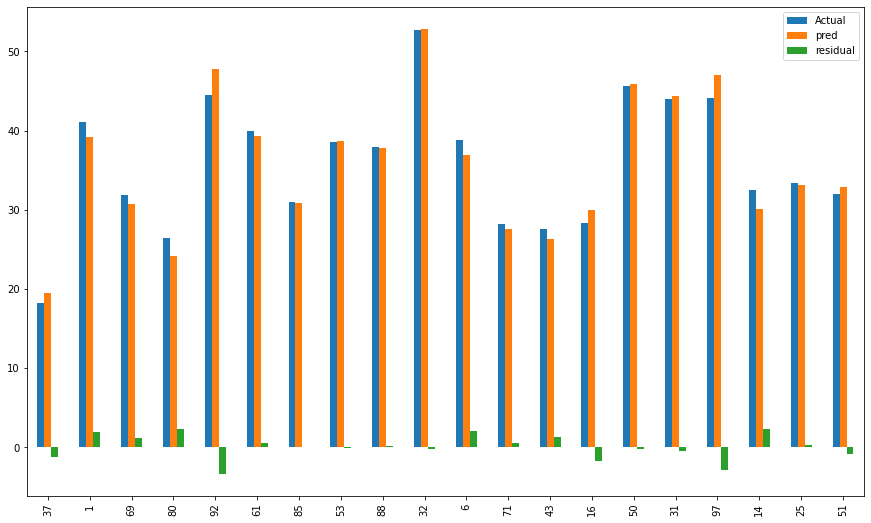

In [353]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

In [354]:
model_poly.coef_

array([ 7.14880493e+00,  6.59994525e+00,  6.35769416e+00,  2.26106994e+01,
        1.30857235e+02,  9.65377500e+00,  8.16595546e+00,  3.96179561e+01,
       -1.77556454e+01, -1.02310112e-03, -1.86399364e-03, -1.79633157e-03,
       -8.22156249e-03, -4.20787177e-02, -2.77921155e-03, -2.39805396e-03,
       -1.26018229e-02,  6.22484669e-03, -7.63493794e-04, -1.69609600e-03,
       -7.33989768e-03, -5.61771909e-02, -2.86137927e-03, -1.83538917e-03,
       -1.81355658e-02,  8.67935027e-03, -8.95404004e-04, -7.25586211e-03,
       -4.47598359e-02, -2.64120663e-03, -1.81565319e-03, -1.38029312e-02,
        6.51295114e-03, -7.96865005e-03, -1.32559760e-01, -9.87075582e-03,
       -8.33913368e-03, -4.26643419e-02,  1.69739147e-02, -9.51062598e-02,
       -5.02362050e-02, -5.20982086e-02, -5.18603867e-02,  2.74292388e-02,
       -2.06214401e-03, -3.26590009e-03, -1.48701144e-02,  6.77541763e-03,
       -1.50086351e-03, -1.51361080e-02,  6.58137061e-03, -6.26530462e-03,
        1.02108778e-03,  

In [355]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [356]:
y_pred = model_poly.predict(X_test)

In [357]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [358]:
eval_metric(y_test, y_pred)

Model performance:
--------------------------
R2_score 	: 0.9604730352315055
MAE 		: 1.2192935642093068
MSE 		: 2.7066203222833556
RMSE 		: 1.6451809390712486


In [359]:
y_train_pred = model_poly.predict(X_train)

In [360]:
eval_metric(y_train, y_train_pred)

Model performance:
--------------------------
R2_score 	: 0.9991497267251552
MAE 		: 0.17046182731059656
MSE 		: 0.048888431671347106
RMSE 		: 0.22110728543254088
